<a href="https://colab.research.google.com/github/rizkifajarnugroho/Deep-Learning-with-Fastai/blob/master/Image_Classifier_with_4_classes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Importing fastai library, updating it, and setting up all dependencies

In [1]:
from fastai.vision import *
!curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
Done.


In [2]:
from google.colab import drive
drive.mount('/content/gdrive')
root_path = 'gdrive/My Drive/your_project_folder/'  #change dir to your project folder

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
folder = 'Aviator Frame'

In [0]:
# to create a new folder in google colab 
path = Path('data/glasses frame shape')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)


In [0]:
folder = 'Cateye Frame'

In [0]:
# to create a new folder in google colab 
path = Path('data/glasses frame shape')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [0]:
folder = 'Round Frame'

In [0]:
# to create a new folder in google colab 
path = Path('data/glasses frame shape')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [0]:
folder = 'Rectangle frame'

In [0]:
# to create a new folder in google colab 
path = Path('data/glasses frame shape')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [0]:
classes = ['Aviator Frame','Cateye Frame','Round Frame','Rectangle Frame']

In [0]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [13]:
data.classes

['Aviator Frame', 'Cateye Frame', 'Rectangle frame', 'Round Frame']

In [14]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['Aviator Frame', 'Cateye Frame', 'Rectangle frame', 'Round Frame'],
 4,
 596,
 149)

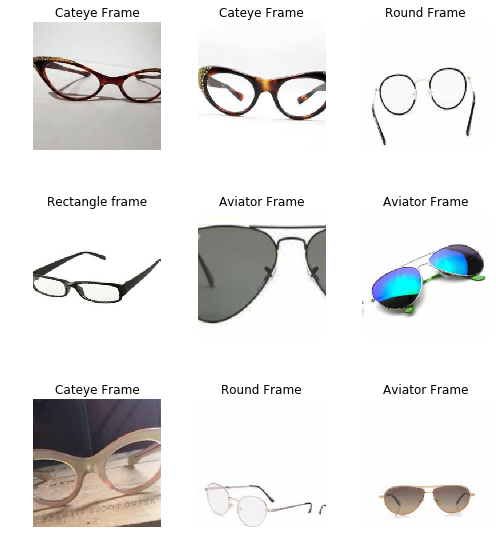

In [15]:
data.show_batch(rows=3, figsize=(7,8))

In [16]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['Aviator Frame', 'Cateye Frame', 'Rectangle frame', 'Round Frame'],
 4,
 596,
 149)

In [17]:
learn = cnn_learner(data, models.resnet50, metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth
100%|██████████| 102502400/102502400 [00:00<00:00, 106210036.58it/s]


In [18]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['Aviator Frame', 'Cateye Frame', 'Rectangle frame', 'Round Frame'],
 4,
 596,
 149)

In [19]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,accuracy,time
0,1.268886,0.776639,0.704698,00:26
1,0.887293,0.534907,0.832215,00:14
2,0.698209,0.493656,0.812081,00:13
3,0.596487,0.493022,0.812081,00:14


In [0]:
learn.save('stage-1')

In [0]:
learn.unfreeze()

In [22]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


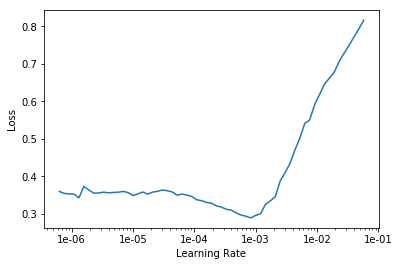

In [23]:
# If the plot is not showing try to give a start and end learning rate
# learn.lr_find(start_lr=1e-5, end_lr=1e-1)
learn.recorder.plot()

In [24]:
learn.fit_one_cycle(4, max_lr=slice(3e-5,3e-4))

epoch,train_loss,valid_loss,accuracy,time
0,0.409672,0.430811,0.859060,00:17
1,0.341498,0.282012,0.912752,00:17
2,0.279105,0.283341,0.926175,00:17
3,0.242209,0.258908,0.932886,00:17


In [0]:
learn.save('stage-2')

In [0]:
learn.load('stage-2');

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

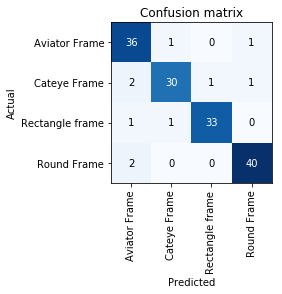

In [28]:
interp.plot_confusion_matrix()

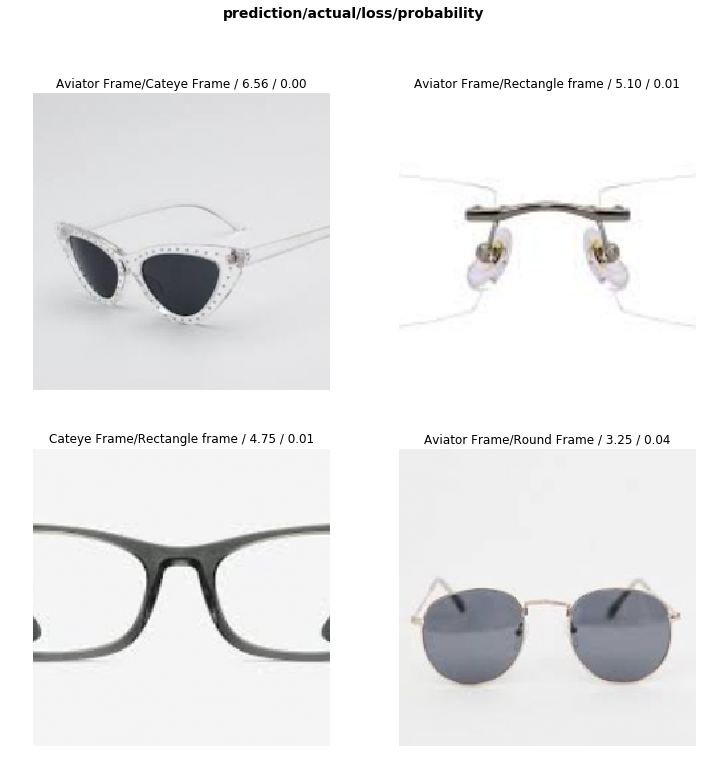

In [29]:
interp.plot_top_losses(4)